# Tutorials
Source: https://docs.lightkurve.org/tutorials/index.html
## LightCurve objects

**Subclasses of LightCurve objects:**
- `KeplerLightCurve` for Kepler and K2 data
- `TessLightCurve`for TESS data

In [1]:
# 0. import
from lightkurve import search_targetpixelfile

In [2]:
# 1. open a Target Pixel File from MAST
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# 2. convert target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [3]:
print(type(tpf))
print(type(lc))

<class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>
<class 'lightkurve.lightcurve.KeplerLightCurve'>


**Definitions**
- Simple Aperture Photometry = simple act of summing up values of all the pixels in a pre-defined aperture, as a function of time
=> choose the shape of the aperture mask to avoid nearby contaminants or improve the strentgh of the specific signal we are trying to measure relative to the background.

- aperture_mask: the default is to use the Kepler pipeline aperture; we can create our own aperture with a boolean numpy array. See cell below.
=> By summing up all the pixels in the aperture, we created a Simple Aperture Photometry (SAP) lightcurve

In [4]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

In [6]:
lc.head()

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
352.37632485035283,43689.1484375,6.631562232971191,683.1803253801079,190.5726135863067,11914,0
352.3967580484896,43698.078125,6.631830215454102,683.1799393446446,190.57243877622443,11915,8192
352.4376244455707,43694.10546875,6.6317877769470215,683.1796254892746,190.57267573478472,11917,16
352.45805764463876,43698.31640625,6.631948947906494,683.1797879898063,190.572495708295,11918,0
352.4784908439324,43687.6484375,6.631504535675049,683.1792868369076,190.5724646436399,11919,0


In [7]:
# check metadata of the light curve
lc.meta

{'APERTURE_MASK': array([[False, False, False, False, False],
        [False, False,  True,  True, False],
        [False, False,  True,  True, False],
        [False,  True,  True,  True, False],
        [False, False, False,  True, False]]),
 'TARGETID': 6922244,
 'LABEL': 'KIC 6922244',
 'CHANNEL': 31,
 'CAMPAIGN': None,
 'QUARTER': 4,
 'MISSION': 'Kepler',
 'RA': 281.28812,
 'DEC': 42.45108}

In [12]:
# time and flux attributes: one flux point for every time stamp
lc.time

<Time object: scale='tdb' format='bkjd' value=[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]>

In [13]:
lc.flux

<Quantity [43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
           43151.562] electron / s>

In [15]:
# Check Combined Differential Photometric Precision (CDPP) noise metric of the lightcurve using the built in method estimate_cdpp()
lc.estimate_cdpp()

<Quantity 75.29876612 ppm>

See
[estimate_cdpp()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.estimate_cdpp.html?highlight=estimate_cdpp#lightkurve.LightCurve.estimate_cdpp)

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

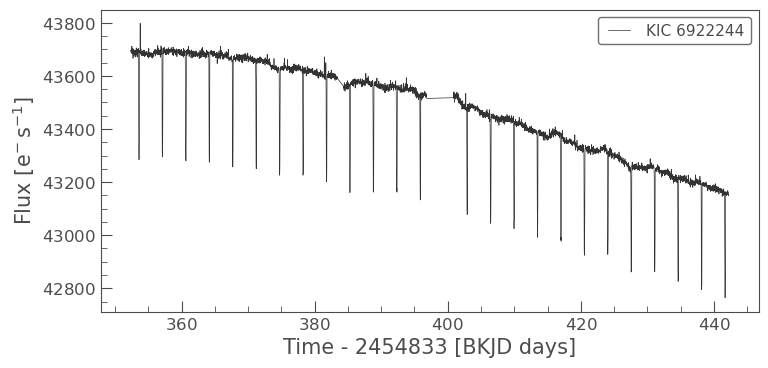

In [18]:
# plot
%matplotlib inline
lc.plot()

### Useful LightCurve methods
- [flatten()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.flatten.html?highlight=flatten#lightkurve.LightCurve.flatten): Remove long term trends using a [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)

- [remove_outliers()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_outliers.html?highlight=remove_outliers#lightkurve.LightCurve.remove_outliers): Remove outliers using simple sigma clipping

- [remove_nans()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.remove_nans.html?highlight=remove_nans#lightkurve.LightCurve.remove_nans): Remove infinite or NaN values (these can occur during thruster firings)

- [fold()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.fold.html?highlight=fold#lightkurve.LightCurve.fold): Fold the data at a particular period

- [bin()](https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.bin.html?highlight=bin#lightkurve.LightCurve.bin): Reduce the time resolution of the array, taking the average value in each bin.

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

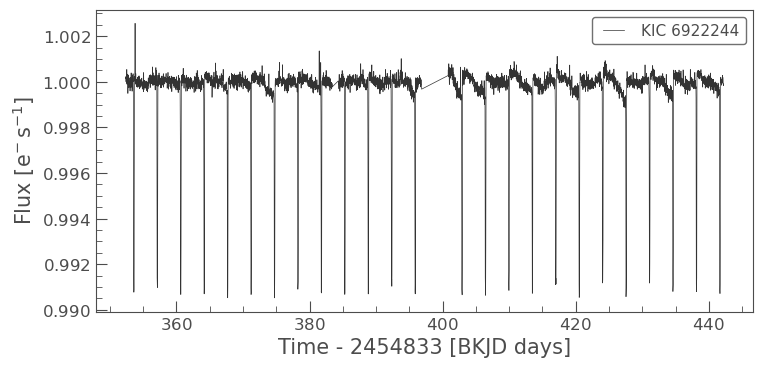

In [19]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

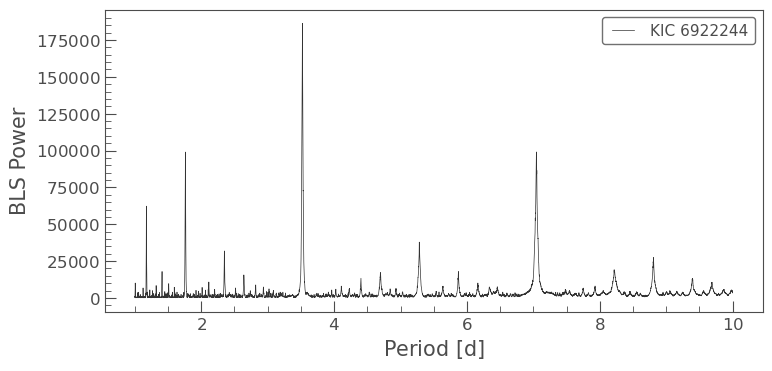

In [24]:
import numpy as np
periodogram = lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()

In [26]:
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

Best fit period:  3.52300 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

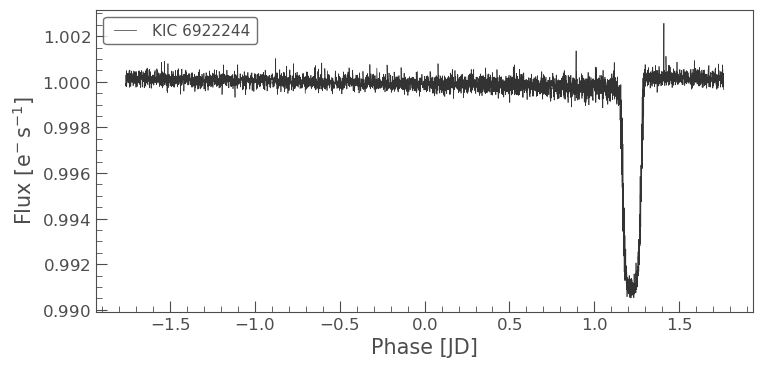

In [27]:
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

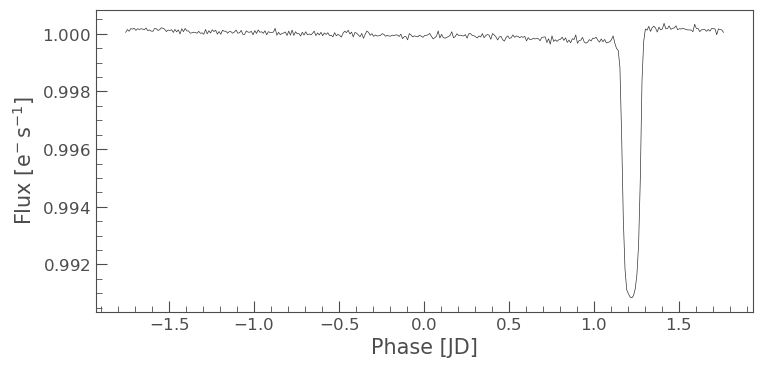

In [28]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()

## TargetPixelFile
Target Pixel Files (TPFs) = movies of pixel data centered on a single target star
= stacks of images with 1 image for every timestamp the telescope took data.
- --> given in [FITS](https://fits.gsfc.nasa.gov/fits_primer.html) Files, file common to Kepler/K2 and TESS

Each timestamp is referred to as a cadence.

subclasses:
- KeplerTargetPixelFile for Kepler and K2 data
- TessTargetPixelFile for TESS data



In [3]:
# 0. import
import lightkurve as lk

In [4]:
# 1.a load data from local path or remote url
tpf = lk.read("https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz")

In [5]:
# Or 1.b load data with search_targetpixelfile
# looks for file in MAST data archive (has Kepler, K2 and TESS)
tpf = search_targetpixelfile("KIC 6922244", author="Kepler", quarter=4, cadence="long").download()

In [6]:
tpf

KeplerTargetPixelFile Object (ID: 6922244)

In [18]:
# 2. Get specific meta data
print(f"mission: {tpf.meta['MISSION']}")
print(f"quarter: {tpf.meta['QUARTER']}")

mission: Kepler
quarter: 4


In [29]:
# 2. Get all meta data from the FITS file
tpf.get_header()

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.25 r60410' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

In [30]:
# 2. Get values in the second extension of the fits file by accessing the AstroPy FITS HDUList object.
# E.g. look at all the column titles:
tpf.hdu[1].header["TTYPE*"]

TTYPE1  = 'TIME    '           / column title: data time stamps                 
TTYPE2  = 'TIMECORR'           / column title: barycenter - timeslice correction
TTYPE3  = 'CADENCENO'          / column title: unique cadence number            
TTYPE4  = 'RAW_CNTS'           / column title: raw pixel counts                 
TTYPE5  = 'FLUX    '           / column title: calibrated pixel flux            
TTYPE6  = 'FLUX_ERR'           / column title: 1-sigma calibrated uncertainty   
TTYPE7  = 'FLUX_BKG'           / column title: calibrated background flux       
TTYPE8  = 'FLUX_BKG_ERR'       / column title: 1-sigma cal. background uncertain
TTYPE9  = 'COSMIC_RAYS'        / column title: cosmic ray detections            
TTYPE10 = 'QUALITY '           / column title: pixel quality flags              
TTYPE11 = 'POS_CORR1'          / column title: column position correction       
TTYPE12 = 'POS_CORR2'          / column title: row position correction          
TTYPE13 = 'RB_LEVEL'        

#### Most interesting data in TPFs:
flux and time --> give brightness of observed target over time.

In [19]:
# 3.1 Get timestamps
tpf.time

<Time object: scale='tdb' format='bkjd' value=[352.37632485 352.39675805 352.43762445 ... 442.16263546 442.18306983
 442.2035041 ]>

In [20]:
# 3.2 get human-readable ISO timestamps
tpf.time.iso

array(['2009-12-19 21:01:54.467', '2009-12-19 21:31:19.895',
       '2009-12-19 22:30:10.752', ..., '2010-03-19 15:54:11.704',
       '2010-03-19 16:23:37.233', '2010-03-19 16:53:02.754'], dtype='<U23')

**Attention:**
these timestamps are in the Solar System Barycentric frame (TDB).
And they don't include corrections for light travel or leap seconds.

We can get time at a different scale, with [AstroPy's time scale conversion features](http://docs.astropy.org/en/stable/time/#time-scale)

In [21]:
# 3.3 Get time at Earth-centered UTC system
tpf.time.utc.iso

array(['2009-12-19 21:00:48.284', '2009-12-19 21:30:13.712',
       '2009-12-19 22:29:04.569', ..., '2010-03-19 15:53:05.518',
       '2010-03-19 16:22:31.048', '2010-03-19 16:51:56.568'], dtype='<U23')

In [22]:
# 4. Get flux shape
tpf.flux.shape

(4116, 5, 5)

=> the flux data here is a 4116x5x5 array in units electrons/second:
- 1st axis: time axis
- 5 pixels by 5 pixels: images

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

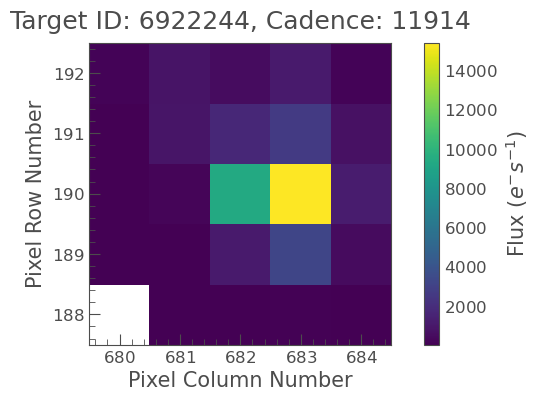

In [23]:
# 5. plot the image data (at one cadence == one timestamp: here cadence 0)
tpf.plot(frame=0)

In [26]:
# 5. Get values from this image
# We can do mean, max, ...
tpf.flux[0]

<Quantity [[          nan, 5.6079335e+00, 5.1491142e+01, 8.4241745e+01,
            3.0221334e+01],
           [4.4045620e+01, 7.6861229e+01, 1.1227759e+03, 3.2262029e+03,
            4.5486777e+02],
           [2.5911165e+01, 2.2907593e+02, 9.3626543e+03, 2.3606273e+04,
            1.2087750e+03],
           [4.0100830e+01, 8.8543927e+02, 1.7102118e+03, 2.6254871e+03,
            7.0796606e+02],
           [1.5719417e+02, 8.3713440e+02, 5.1021539e+02, 1.1501041e+03,
            1.8313370e+02]] electron / s>

In [25]:
tpf.animate()

### Turning TPF into light curve:
- --> single flux value for every time value.
- --> each pixels are 4 arcseconds across
- --> the point spread function (PSF) of telescope causes the light from the star onto several different pixels (as we see in image above).

=> Because of the spreading, we need to sum up many pixels to get all the light from the source.
=> To do this: sum of all pixels in an aperture.
Aperture = pixel mask where we take onlt the pixels related to the target.

Kepler pipeline adds an aperture mask to every TPF. => This aperture determines which pixels are summed to create a 1-D light curve of the target.

But in some science cases, we might want to create a different aperture: e.g.
- there may be a nearby contaminant
- want to measure the background.

In [27]:
# 6. Get standard pipeline aperture (boolean array)
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

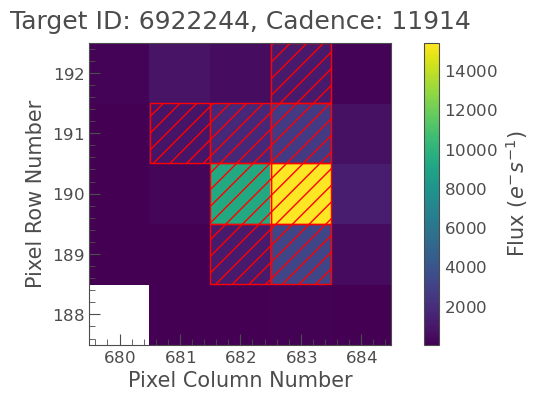

In [28]:
# 7. plot the aperture_mask to check if the aperture covers all the flux of the star
tpf.plot(aperture_mask=tpf.pipeline_mask)